### CIFAR datasets 10 classes
Automobile Airplane Bird Cat Deer Dog Frog Horse Ship Truck

In [1]:
# -*- coding=utf-8 -*-
import numpy as np
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers import Convolution2D,MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

### 加载CIFAR数据集 cifar10.load_data()

In [3]:
(train_x,train_y),(test_x,test_y)=cifar10.load_data()
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


## 数据可视化

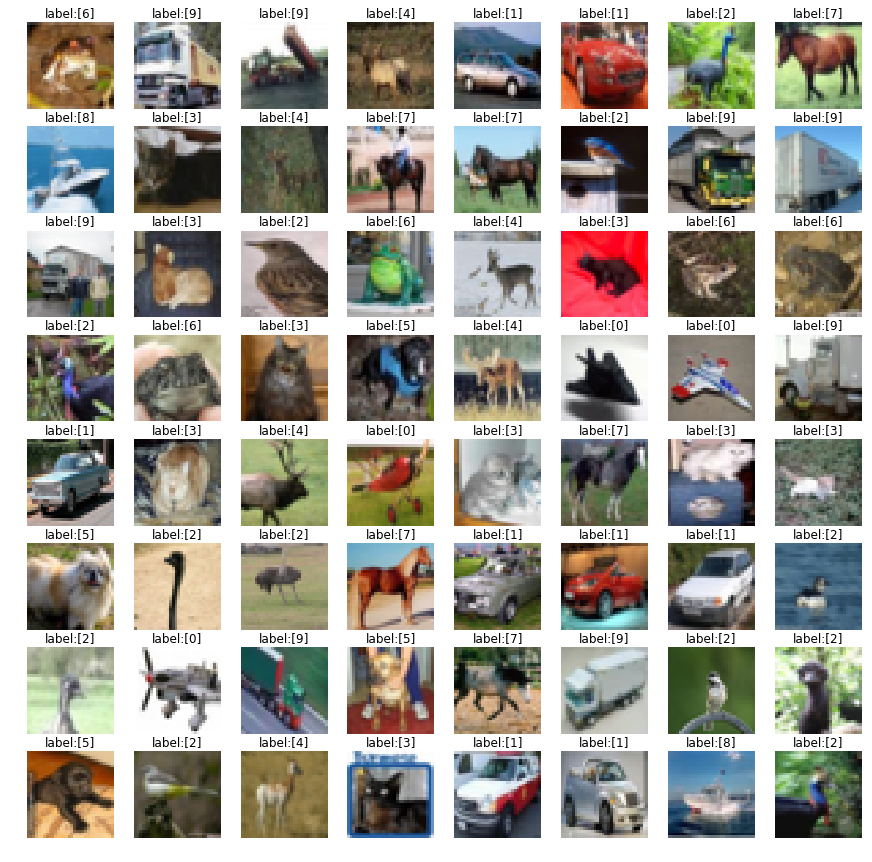

In [4]:
####data visualization
f=plt.figure(figsize=(15,15))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.axis("off")
    plt.title("label:{0}".format(train_y[i]))
    plt.imshow(train_x[i])
plt.show()

In [5]:
n_classes=10
train_y=keras.utils.to_categorical(train_y,10)
test_y=keras.utils.to_categorical(test_y,10)

In [6]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


### test_y,train_y已经转换为one_hot coding

In [7]:
####establish training model
from keras.layers import Activation

model=Sequential()
###convolutional layer 1
model.add(Convolution2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),strides=(1,1),\
                        padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(strides=(2,2),padding='same'))
model.add(Dropout(0.25))
###convolutional layer 2
model.add(Convolution2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(strides=(2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())###扁平化
##fc layer1
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.5))
##fc layer2
model.add(Dense(units=n_classes,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [9]:
from keras.optimizers import Adadelta
model.compile(optimizer=Adadelta(),loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_x,train_y,epochs=10,batch_size=128,verbose=1)

Epoch 1/10
50000/50000 [==============================] - 103s 2ms/step - loss: 14.5051 - acc: 0.0996
Epoch 2/10
50000/50000 [==============================] - 108s 2ms/step - loss: 14.4719 - acc: 0.1008
Epoch 3/10
50000/50000 [==============================] - 104s 2ms/step - loss: 6.7488 - acc: 0.1380
Epoch 4/10
50000/50000 [==============================] - 105s 2ms/step - loss: 2.0325 - acc: 0.2569
Epoch 5/10
50000/50000 [==============================] - 103s 2ms/step - loss: 1.7406 - acc: 0.3743
Epoch 6/10
50000/50000 [==============================] - 102s 2ms/step - loss: 1.5878 - acc: 0.4339
Epoch 7/10
50000/50000 [==============================] - 102s 2ms/step - loss: 1.5044 - acc: 0.4646
Epoch 8/10
50000/50000 [==============================] - 105s 2ms/step - loss: 1.4338 - acc: 0.4949
Epoch 9/10
50000/50000 [==============================] - 104s 2ms/step - loss: 1.3699 - acc: 0.5182
Epoch 10/10
50000/50000 [==============================] - 105s 2ms/step - loss: 1.3248 -

In [11]:
evaluation=model.evaluate(test_x,test_y,batch_size=128,verbose=1)
print("loss:{0},accuracy:{1}".format(evaluation[0],evaluation[1]))

10000/10000 [==============================] - 7s 674us/step
loss:1.221732147026062,accuracy:0.5804


(32, 32, 3)


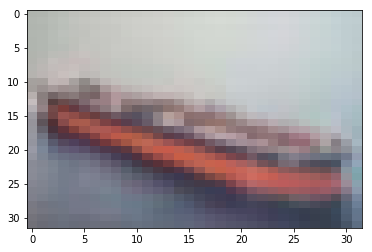

In [12]:
img_idx=999
plt.imshow(test_x[999],aspect='auto')
print(test_x[999].shape)

In [17]:
img=test_x[999][np.newaxis,:,:,:]
print("truth:{1},predict{0}".format(model.predict_classes(img,batch_size=1),test_y[img_idx]))
print(model.predict_proba(img,batch_size=1))

truth:[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.],predict[8]
[[5.7995077e-02 1.7474737e-02 8.9454814e-04 2.4652469e-04 9.5118725e-05
  4.0579922e-05 1.5291266e-04 2.3511841e-06 9.1788518e-01 5.2128867e-03]]


## Utility Methods to understand CNN
+ source: https://github.com/fchollet/keras/issues/431
+ source: https://github.com/philipperemy/keras-visualize-activations/blob/master/read_activations.py

In [18]:
def get_activations(model, model_inputs, print_shape_only=True, layer_name=None):
    import keras.backend as K
    print('----- activations -----')
    activations = []
    inp = model.input

    model_multi_inputs_cond = True
    if not isinstance(inp, list):
        # only one input! let's wrap it in a list.
        inp = [inp]
        model_multi_inputs_cond = False

    outputs = [layer.output for layer in model.layers if
               layer.name == layer_name or layer_name is None]  # all layer outputs

    funcs = [K.function(inp + [K.learning_phase()], [out]) for out in outputs]  # evaluation functions

    if model_multi_inputs_cond:
        list_inputs = []
        list_inputs.extend(model_inputs)
        list_inputs.append(1.)
    else:
        list_inputs = [model_inputs, 1.]

    # Learning phase. 1 = Test mode (no dropout or batch normalization)
    # layer_outputs = [func([model_inputs, 1.])[0] for func in funcs]
    layer_outputs = [func(list_inputs)[0] for func in funcs]
    for layer_activations in layer_outputs:
        activations.append(layer_activations)
        if print_shape_only:
            print(layer_activations.shape)
        else:
            print(layer_activations)
    return activations

In [19]:
activation=get_activations(model, img)

----- activations -----
(1, 32, 32, 32)
(1, 32, 32, 32)
(1, 16, 16, 32)
(1, 16, 16, 32)
(1, 16, 16, 64)
(1, 16, 16, 64)
(1, 8, 8, 64)
(1, 8, 8, 64)
(1, 4096)
(1, 128)
(1, 128)
(1, 10)


In [20]:
# https://github.com/philipperemy/keras-visualize-activations/blob/master/read_activations.py
def display_activations(activation_maps):
    import numpy as np
    import matplotlib.pyplot as plt
    """
    (1, 32, 32, 32)
    (1, 32, 32, 32)
    (1, 16, 16, 32)
    (1, 16, 16, 32)
    (1, 16, 16, 64)
    (1, 16, 16, 64)
    (1, 8, 8, 64)
    (1, 8, 8, 64)
    (1, 4096)
    (1, 128)
    (1, 128)
    (1, 10)
    """
    batch_size = activation_maps[0].shape[0]
    assert batch_size == 1, 'One image at a time to visualize.'
    for i, activation_map in enumerate(activation_maps):
        print('Displaying activation map {}'.format(i))
        shape = activation_map.shape
        if len(shape) == 4:
            activations = np.hstack(np.transpose(activation_map[0], (2, 0, 1)))
        elif len(shape) == 2:
            # try to make it square as much as possible. we can skip some activations.
            activations = activation_map[0]
            num_activations = len(activations)
            if num_activations > 1024:  # too hard to display it on the screen.
                square_param = int(np.floor(np.sqrt(num_activations)))
                activations = activations[0: square_param * square_param]
                activations = np.reshape(activations, (square_param, square_param))
            else:
                activations = np.expand_dims(activations, axis=0)
        else:
            raise Exception('len(shape) = 3 has not been implemented.')
        #plt.imshow(activations, interpolation='None', cmap='binary')
        fig, ax = plt.subplots(figsize=(18, 12))
        ax.imshow(activations, interpolation='None', cmap='binary')
        plt.show()

Displaying activation map 0


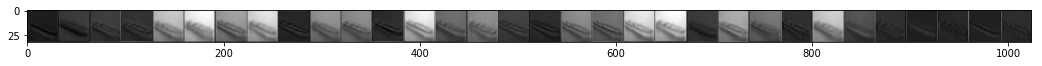

Displaying activation map 1


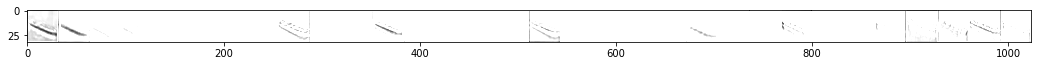

Displaying activation map 2


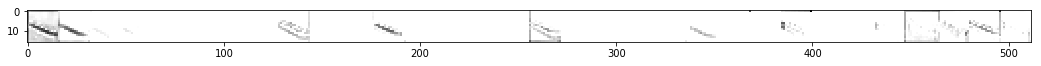

Displaying activation map 3


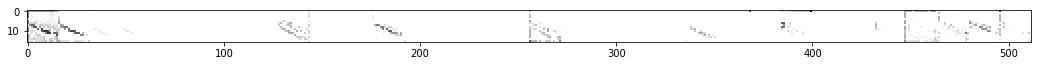

Displaying activation map 4


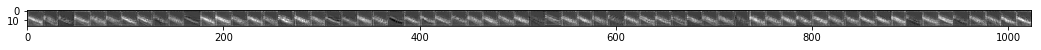

Displaying activation map 5


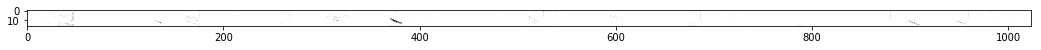

Displaying activation map 6


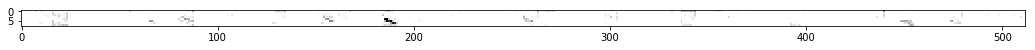

Displaying activation map 7


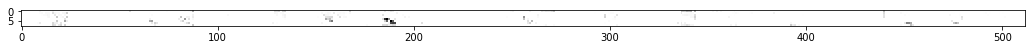

Displaying activation map 8


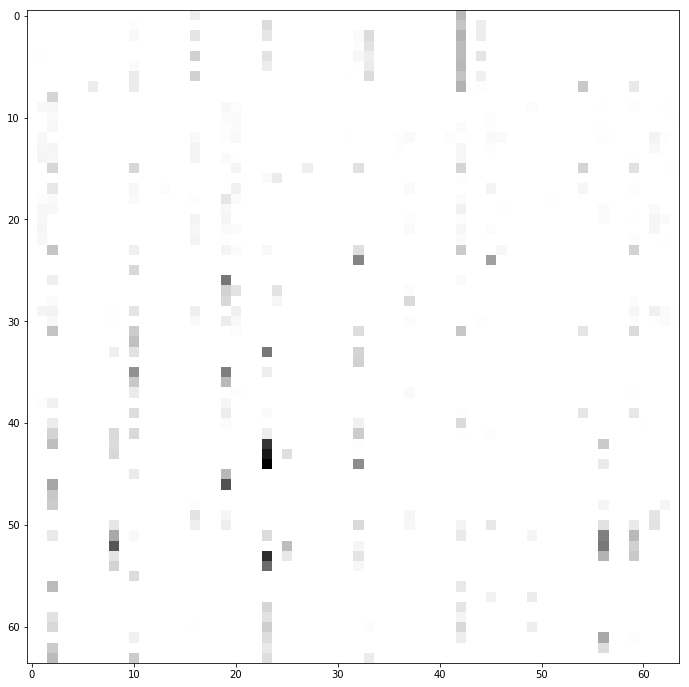

Displaying activation map 9


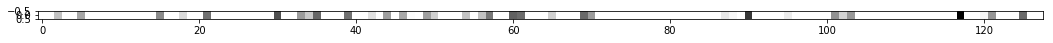

Displaying activation map 10


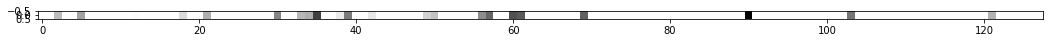

Displaying activation map 11


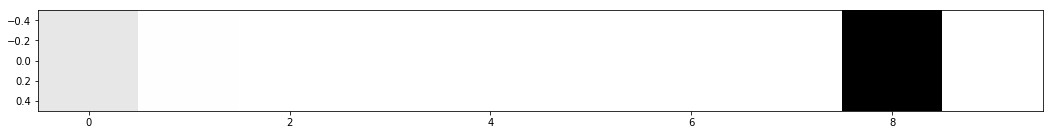

In [21]:
display_activations(activation)